In [2]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Open the Image

In [10]:
img = Image.open('Grayscale_Image.jpg')

image_size = img.size
image_mode = img.mode
image_format = img.format
print(f"Image Size: {image_size}")
print(f"Image Mode: {image_mode}")
print(f"Image Format: {image_format}")

Image Size: (1920, 1200)
Image Mode: RGB
Image Format: JPEG


# Nearest Neighbor Interpolation

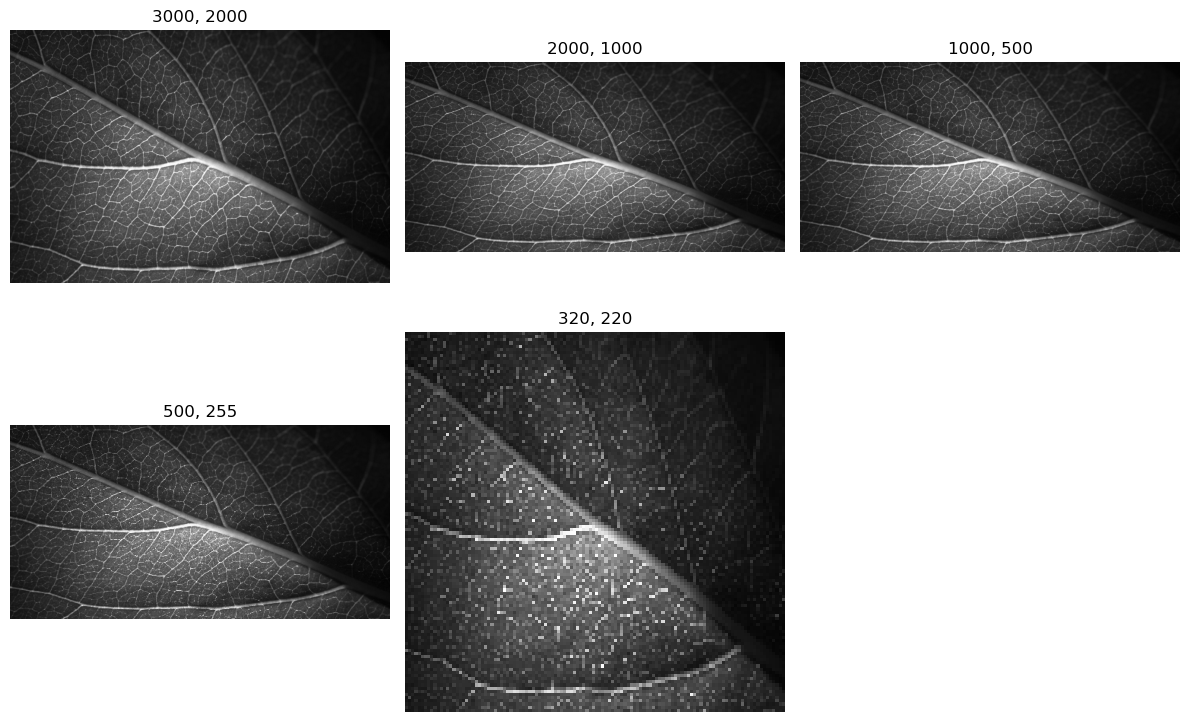

In [25]:
dimensions = [(3000, 2000), (2000, 1000), (1000, 500),(500,255),(120,120)]
titles = ["3000, 2000", "2000, 1000", "1000, 500", "500, 255", "320, 220"]
images = []

for i, dim in enumerate(dimensions):
    resized_nearest = img.resize(dim, Image.NEAREST)   # Nearest Neighbor Interpolation
    images.append((resized_nearest, titles[i]))

num_images = len(images)
columns = 3
rows = (num_images + columns - 1) // columns

plt.figure(figsize=(12, 8))

for i, (image, title) in enumerate(images, 1):
    plt.subplot(rows, columns, i)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Bilinear Interpolation

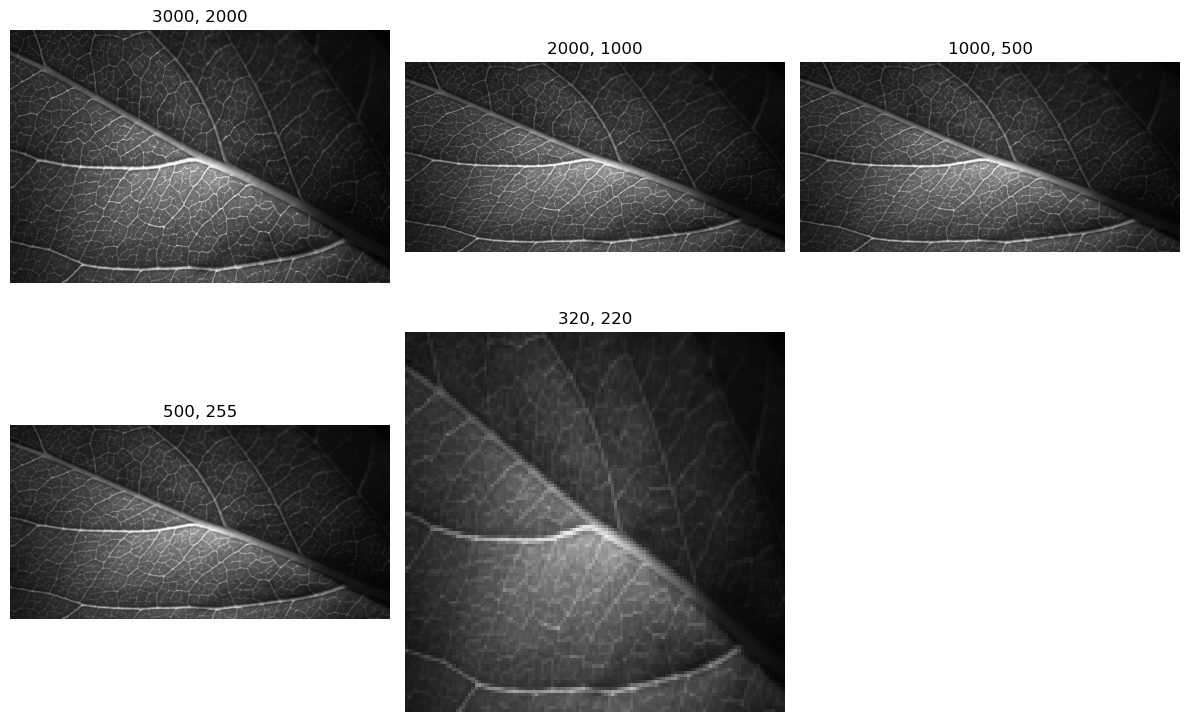

In [26]:
dimensions = [(3000, 2000), (2000, 1000), (1000, 500),(500,255),(120,120)]
titles = ["3000, 2000", "2000, 1000", "1000, 500", "500, 255", "320, 220"]
images = []

for i, dim in enumerate(dimensions):
    resized_nearest = img.resize(dim, Image.BILINEAR)  # Bilinear Interpolation
    images.append((resized_nearest, titles[i]))

num_images = len(images)
columns = 3
rows = (num_images + columns - 1) // columns

plt.figure(figsize=(12, 8))

for i, (image, title) in enumerate(images, 1):
    plt.subplot(rows, columns, i)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Bicubic Interpolation

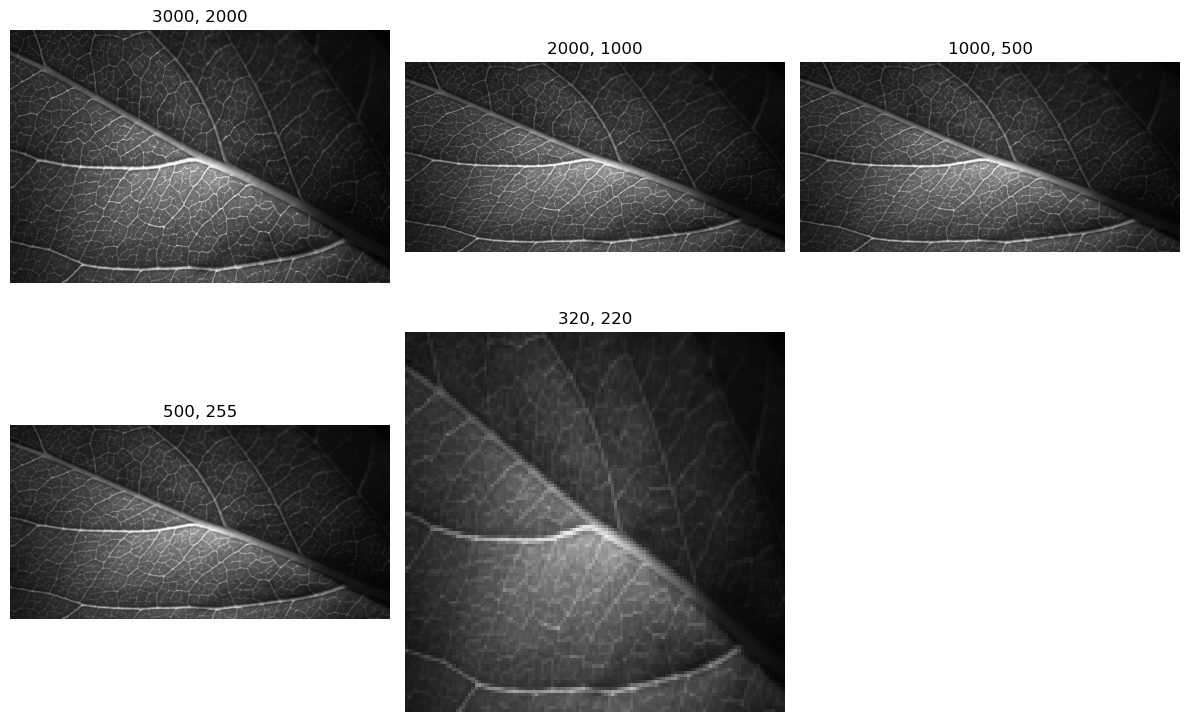

In [27]:
dimensions = [(3000, 2000), (2000, 1000), (1000, 500),(500,255),(120,120)]
titles = ["3000, 2000", "2000, 1000", "1000, 500", "500, 255", "320, 220"]
images = []

for i, dim in enumerate(dimensions):
    resized_nearest = img.resize(dim, Image.BILINEAR)  # Bicubic Interpolation
    images.append((resized_nearest, titles[i]))

num_images = len(images)
columns = 3
rows = (num_images + columns - 1) // columns

plt.figure(figsize=(12, 8))

for i, (image, title) in enumerate(images, 1):
    plt.subplot(rows, columns, i)
    plt.imshow(image)
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()


# Linear interpolation

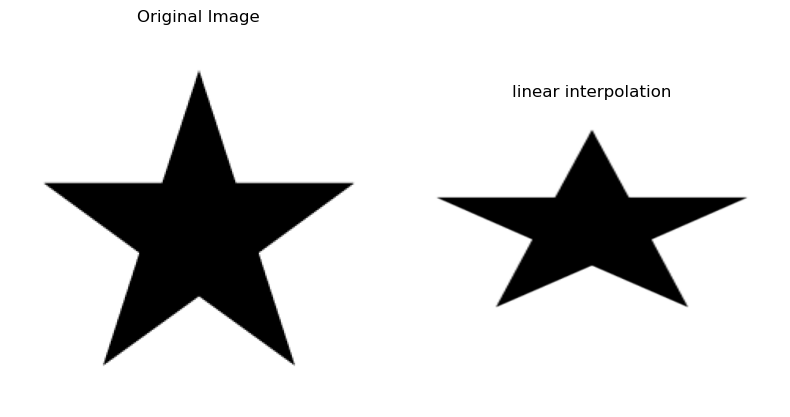

In [11]:

# Read the image
image = cv2.imread('image2.png')

# Define the new dimensions for the resized image
new_width, new_height = 500, 300  # Change these values as needed

# Perform linear interpolation for resizing
resized_image = cv2.resize(image, (new_width, new_height), interpolation=cv2.INTER_LINEAR)

# Display the original and resized images using Matplotlib
plt.figure(figsize=(8, 6))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')
plt.axis('off')

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.title('linear interpolation')
plt.axis('off')

plt.tight_layout()
plt.show()


# Ordered dithering

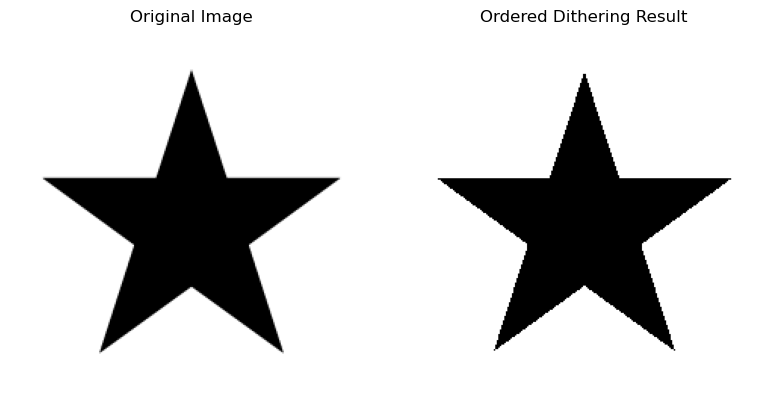

In [12]:

def ordered_dithering(image, dither_matrix):
    # Convert image to grayscale
    image = image.convert('L')

    width, height = image.size
    output_image = Image.new('L', (width, height))

    # Iterate through each pixel
    for y in range(height):
        for x in range(width):
            old_pixel = image.getpixel((x, y))
            new_pixel = 255 * (old_pixel > dither_matrix[x % 4][y % 4])
            output_image.putpixel((x, y), int(new_pixel))

    return output_image

# Open an image
input_image = Image.open('image2.png')

# Define the dither matrix (4x4 Bayer matrix)
dither_matrix = [
    [0, 8, 2, 10],
    [12, 4, 14, 6],
    [3, 11, 1, 9],
    [15, 7, 13, 5]
]

# Apply ordered dithering
output_image = ordered_dithering(input_image, dither_matrix)

# Convert images to NumPy arrays
input_array = np.array(input_image)
output_array = np.array(output_image)

# Display the original and dithered images using Matplotlib
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(input_array, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Dithered image
plt.subplot(1, 2, 2)
plt.imshow(output_array, cmap='gray')
plt.title('Ordered Dithering Result')
plt.axis('off')

plt.tight_layout()
plt.show()


# Threshold mask

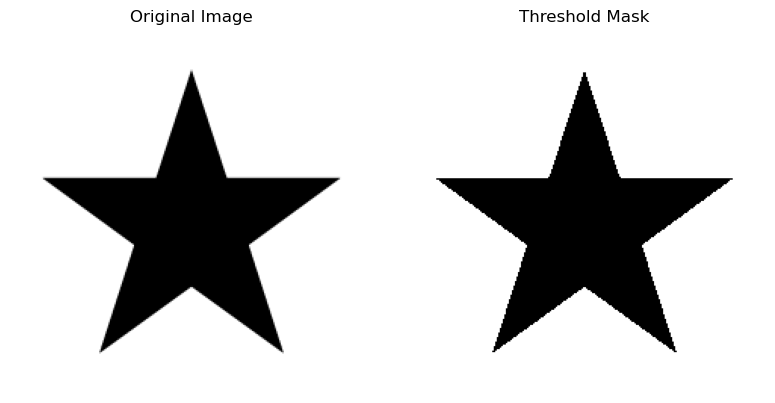

In [13]:

# Read the image in grayscale
image = cv2.imread('image2.png', cv2.IMREAD_GRAYSCALE)

# Set a threshold value
threshold_value = 128  # Adjust this value as needed

# Apply thresholding to create the mask
_, threshold_mask = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)

# Display the original image and the threshold mask using Matplotlib
plt.figure(figsize=(8, 4))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Threshold mask
plt.subplot(1, 2, 2)
plt.imshow(threshold_mask, cmap='gray')
plt.title('Threshold Mask')
plt.axis('off')

plt.tight_layout()
plt.show()
